# 1. Wprowadzanie i opis wybranego problemu

W tym projekcie za zadanie obrałem sobie stworzenie modelu klasyfikacji, który będzie przewidywał czy dana osoba zarabia ponad 50 tys. dolarów rocznie. Model swój oparłem na zbiorze danych pochodzącym z Census Bureau, agencji rządowej, która zajmuje się spisami ludności i zestawieniami statystycznymi. Dane pochodzą z 1996 roku. Dane podane są jako zbiór unikalnych obserwacji z wagami, należy jednak pamiętać, że w tym przypadku wagi to nie są faktycznie częstości występowania obserwacji, a pewna ocena występowania.

Zmienne oraz ich wartości: 
* age - zmienna ciągła.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt - waga rekordu.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num - zmienna ciągła.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain - zmienna ciągła.
* capital-loss - zmienna ciągła.
* hours-per-week - zmienna ciągła.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


# 2. Czyszczenie i wstępne przetwarzanie danych

## Pobranie danych

In [1]:
import requests
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
r = requests.get(url, allow_redirects=True)
title = 'adult.data'
open(title, 'wb').write(r.content)

3974305

## Wczytanie danych

In [2]:
import pandas as pd
fileName = 'adult.data'
df = pd.read_csv(filepath_or_buffer= fileName, 
                        header=None,
                        na_values = ['?', ' ?'],
                        sep=',', 
                        engine='python')


Bazując na dokumentacji zbioru, przyjąłem wartości "?" jako braki danych

### Zmiana nazw kolumn

In [3]:
col_names_list = [
    'age'
    ,'workclass'
    ,'fnlwgt'
    ,'education'
    ,'education-num'
    ,'marital-status'
    ,'occupation'
    ,'relationship'
    ,'race'
    ,'sex'
    ,'capital-gain'
    ,'capital-loss'
    ,'hours-per-week'
    ,'native-country'
    ,'income'
]
df.columns = col_names_list
df.head(n=50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Czyszczenie danych

In [4]:
# checking column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Sprawdzenie struktury braków danych

In [5]:
# missing data
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

<AxesSubplot:>

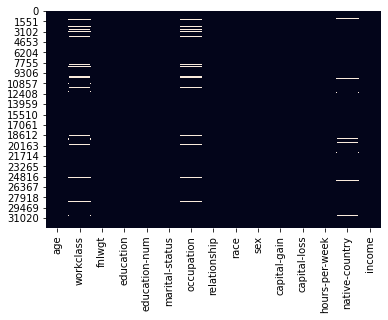

In [6]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

<AxesSubplot:>

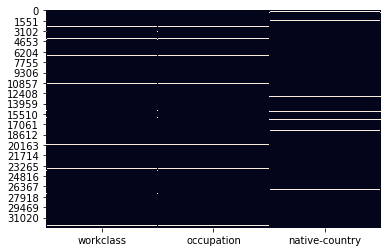

In [7]:
sns.heatmap(df[['workclass','occupation','native-country']].isnull(), cbar=False)

<AxesSubplot:>

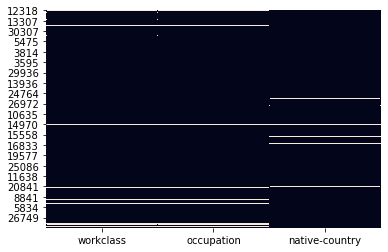

In [8]:
#sorted by age
sorted = df.sort_values('age')
sns.heatmap(sorted[['workclass','occupation','native-country']].isnull(), cbar=False)

Tylko 3 kolumny zawierały braki danych, z czego braki w kolumnach wokrclass i occupation się pokrywały.
Zdecydowałem się usunąć ze zbioru dancyh rekordy z brakami.

### Usunięcie braków danych

In [9]:
#drop missing values
df.dropna(inplace=True)

### Usunięcie zduplikowanych kolumn

In [10]:
# drop duplicated column
df.drop(['education-num'], axis = 1, inplace = True)

In [11]:
df.shape

(30162, 14)

## Kodowanie One-hot zmiennych jakościowych

In [12]:
cat_col_list = [
    'workclass'
    ,'education'
    ,'marital-status'
    ,'occupation'
    ,'relationship'
    ,'race'
    ,'sex'
    ,'native-country'
]

In [13]:
for column_name in cat_col_list:
    categories = set(df[column_name])

    for cat in categories:
        df[cat] = df[column_name].transform(lambda s: int(cat in s))

In [14]:
#dropping original categorical columns
df.drop(cat_col_list, axis = 1, inplace = True)

In [15]:
#dropping one one of two features from two-value column
df.drop([' Female'], axis = 1, inplace = True)

In [16]:
df.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,Self-emp-not-inc,Private,Self-emp-inc,Without-pay,...,Columbia,Mexico,Thailand,Cuba,Trinadad&Tobago,Outlying-US(Guam-USVI-etc),Puerto-Rico,India,Jamaica,Greece
0,39,77516,2174,0,40,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50,83311,0,0,13,<=50K,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38,215646,0,0,40,<=50K,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,53,234721,0,0,40,<=50K,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,338409,0,0,40,<=50K,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


## Usunięcie rzadko występujących wartości

In [17]:
import matplotlib.pyplot as plt
def myFunc(df, cut_off, n=6, getColNames=False):
    if getColNames == False:
        return df[df.columns[n:]].agg('sum').where(df[df.columns[n:]].agg('sum') < cut_off).dropna().size
    if getColNames == True:
        return df[df.columns[n:]].agg('sum').where(df[df.columns[n:]].agg('sum') < cut_off).dropna()#.size

### Szukanie punktu odcięcia częstości występowania danej wartości

In [18]:
x = pd.Series(range(0, int(df.size / 3000),50))
x = x.to_frame()
x.columns = ['x']
x['cut_off'] = x.apply(lambda row: myFunc(df, row.x),axis=1)


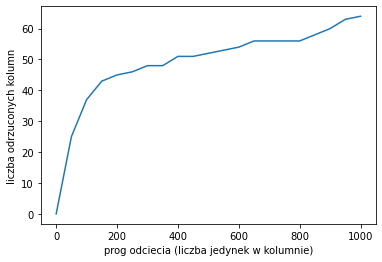

In [19]:
plt.plot(x.x, x.cut_off)
plt.xlabel('prog odciecia (liczba jedynek w kolumnie)')
plt.ylabel('liczba odrzuconych kolumn');

Na podstawie wykresu wybrany został próg odcięcia na poziomie 200. 

In [20]:
sparsely_col_name = list(myFunc(df, 200, getColNames=True).index)
df.drop(sparsely_col_name, axis = 1, inplace = True)

In [21]:
df.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,Self-emp-not-inc,Private,Self-emp-inc,State-gov,...,Other-relative,Not-in-family,Other,Black,White,Amer-Indian-Eskimo,Asian-Pac-Islander,Male,United-States,Mexico
0,39,77516,2174,0,40,<=50K,0,0,0,1,...,0,1,0,0,1,0,0,1,1,0
1,50,83311,0,0,13,<=50K,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
2,38,215646,0,0,40,<=50K,0,1,0,0,...,0,1,0,0,1,0,0,1,1,0
3,53,234721,0,0,40,<=50K,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
4,28,338409,0,0,40,<=50K,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


## Zapisywanie wartości zmiennej celu jako wartości 0, 1

In [22]:
def decodeIncome(income):
    if income == ' <=50K':
        return 0
    elif income == ' >50K':
        return 1
df['income'] = df.apply(lambda row: decodeIncome(row.income),axis=1)

In [23]:
df.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,Self-emp-not-inc,Private,Self-emp-inc,State-gov,...,Other-relative,Not-in-family,Other,Black,White,Amer-Indian-Eskimo,Asian-Pac-Islander,Male,United-States,Mexico
0,39,77516,2174,0,40,0,0,0,0,1,...,0,1,0,0,1,0,0,1,1,0
1,50,83311,0,0,13,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
2,38,215646,0,0,40,0,0,1,0,0,...,0,1,0,0,1,0,0,1,1,0
3,53,234721,0,0,40,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
4,28,338409,0,0,40,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


# 3. EDA

age for income = 1 and income = 0:


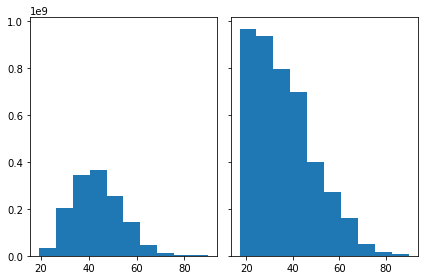

In [24]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(x=df['age'].where(df['income'] == 1), weights=df['fnlwgt'].where(df['income'] == 1))
axs[1].hist(x=df['age'].where(df['income'] == 0), weights=df['fnlwgt'].where(df['income'] == 0))
print('age for income = 1 and income = 0:')

capital-gain for income = 1 and income = 0:


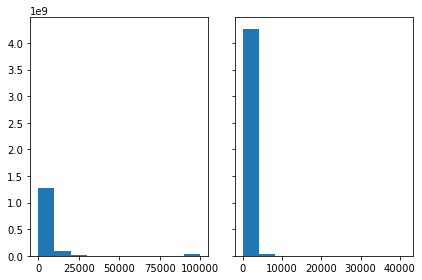

In [25]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(x=df['capital-gain'].where(df['income'] == 1), weights=df['fnlwgt'].where(df['income'] == 1))
axs[1].hist(x=df['capital-gain'].where(df['income'] == 0), weights=df['fnlwgt'].where(df['income'] == 0))
print('capital-gain for income = 1 and income = 0:')

capital-loss for income = 1 and income = 0:


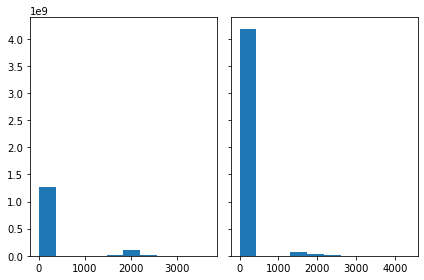

In [26]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(x=df['capital-loss'].where(df['income'] == 1), weights=df['fnlwgt'].where(df['income'] == 1))
axs[1].hist(x=df['capital-loss'].where(df['income'] == 0), weights=df['fnlwgt'].where(df['income'] == 0))
print('capital-loss for income = 1 and income = 0:')

hours-per-week for income = 1 and income = 0:


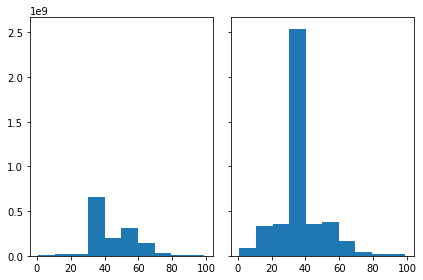

In [27]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(x=df['hours-per-week'].where(df['income'] == 1), weights=df['fnlwgt'].where(df['income'] == 1))
axs[1].hist(x=df['hours-per-week'].where(df['income'] == 0), weights=df['fnlwgt'].where(df['income'] == 0))
print('hours-per-week for income = 1 and income = 0:')

categories by income:


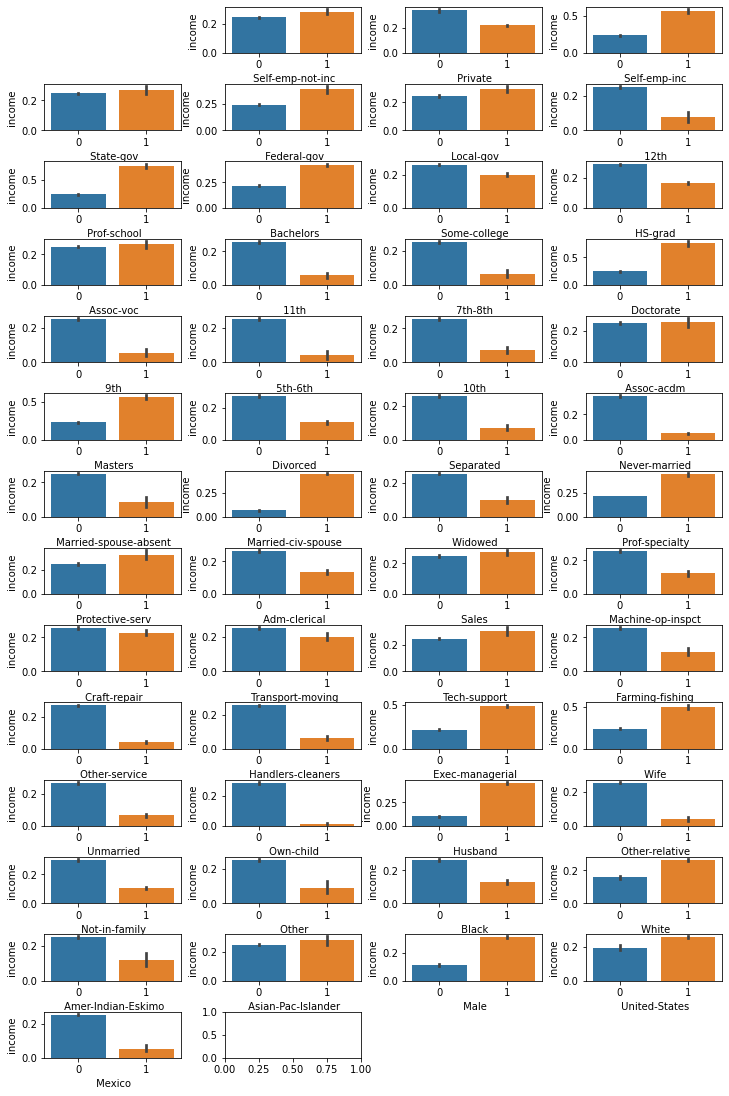

In [28]:
f, axes = plt.subplots(14, 4, figsize =[10,15])
plt.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0)
for n,col in enumerate(df.columns[5:]):
    sns.barplot(x=col, y="income", data=df, ax=axes[n//4,n%4])
f.delaxes(axes[13,2]);f.delaxes(axes[13,3]);f.delaxes(axes[0,0])
print('categories by income:')

# 4. Stworzenie modeli i tuning hiperparametrów

## Podział zbioru danych na zbiór walidacyjny i testowy

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop('income', axis = 1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.40, random_state = 42)


In [30]:
wght_train = X_train.pop('fnlwgt')
wght_train

15405    199378
16717    198452
2712     224059
10220    128591
18453    163671
          ...  
32171     67852
5875     120539
935      176900
17056     51662
25528    196328
Name: fnlwgt, Length: 18097, dtype: int64

In [31]:
wght_test = X_test.pop('fnlwgt')

## Model

Mamy tu do czynienia z klasyfikacją. Użyty model to las losowy, ze względu na dobrą jakość predykcji i możliwość interpretacji modelu.

### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier#,GradientBoostingRegressor
import numpy as np
from sklearn.metrics import accuracy_score

def acc(model,X,y): #accuracy test
    return accuracy_score( y, model.predict(X) )

#### Tuning hiperparametrów

Wyznaczenie optymalnej liczby drzew na podstawie miary Accuracy:

In [33]:
#Checking number of tress influence
rfr = RandomForestClassifier
N = [10,50,100,200,300,400,500,600,700]
acc_list= [acc(rfr(n,n_jobs=-1).fit(X_train,y_train, sample_weight = wght_train),X_test,y_test) for n in N]

600

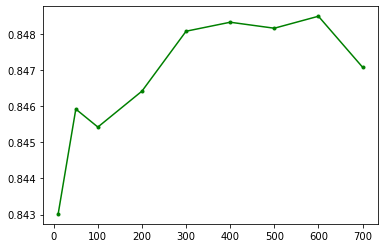

In [34]:
plt.plot(N,acc_list,'.-',color='g');
best_trees_num = N[np.argmax(acc_list)]
best_trees_num

In [35]:
print('Najlepszy wynik został osiągnięty dla ' +str(best_trees_num)+ ' drzew.')

Najlepszy wynik został osiągnięty dla 600 drzew.


#### Wyznaczenie optymalnej liczby feature'ów dla Accuracy

In [36]:
#Checking number of features influence
features = np.linspace(1,X_train.shape[1],10).astype(int)
acc_features= [acc(
    rfr(best_trees_num
        ,max_features=n
        ,n_jobs=-1
       ).fit(
        X_train
        ,y_train
        ,sample_weight=wght_train)
    ,X_test
    ,y_test) 
                   for n in features]

19

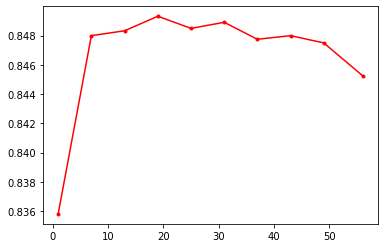

In [37]:
plt.plot(features,acc_features,'.-',color='r');
best_feat_numb = features[np.argmax(acc_features)]
best_feat_numb

In [38]:
print('Najlepszy wynik został osiągnięty dla ' +str(best_feat_numb) + ' featureów.')

Najlepszy wynik został osiągnięty dla 19 featureów.


In [39]:
print('Największą wartość accuracy osiągnięto dla parametrów: ' +str(best_trees_num)+ ' drzew i ' +str(best_feat_numb)+ '  featureów.')
print('Dla tych parametrów zostanie stworzony las losowy')

Największą wartość accuracy osiągnięto dla parametrów: 600 drzew i 19  featureów.
Dla tych parametrów zostanie stworzony las losowy


In [40]:
Best_RF_model = RandomForestClassifier(best_trees_num,max_features=best_feat_numb,n_jobs=-1)
Best_RF = Best_RF_model.fit(X_train,y_train, sample_weight = wght_train)

In [41]:
print('accuracy:')
acc(Best_RF,X_test,y_test)

accuracy:


0.8486531288852052

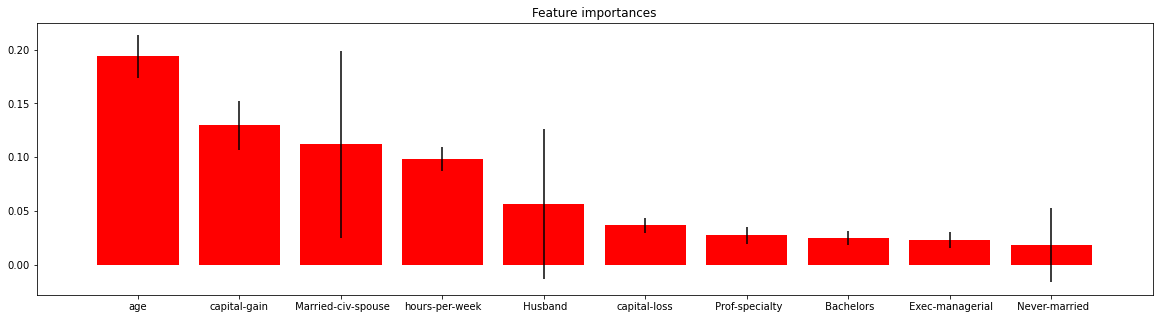

top 10 important features


In [42]:
# Plot the feature importances of the forest
importances = Best_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in Best_RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

num_feat = 10
plt.figure(figsize=[20,5])
plt.title("Feature importances")
plt.bar(range(num_feat)[:num_feat], importances[indices][:num_feat],
       color="r", yerr=std[indices][:num_feat], align="center")
plt.xticks(range(num_feat)[:num_feat], X_train.columns[indices][:num_feat])
plt.xlim([-1, num_feat])
plt.show()
print('top 10 important features')

In [43]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, Best_RF.predict(X_test)).ravel()
(tn, fp, fn, tp)

(8311, 717, 1109, 1928)

## Regresja logistyczna

In [44]:
from sklearn.linear_model import LogisticRegression

#### Regresja logistyczna z ustawieniami domyślnymi

In [45]:
RL_model = LogisticRegression(max_iter = 10000) #default value of max_inter did not converge 
RL = RL_model.fit(X_train,y_train, sample_weight = wght_train)
print('accuracy:')
acc(RL,X_test,y_test)

accuracy:


0.8474927476170742

#### Regresja logistyczna z regularyzacją L1

In [46]:
RL1_model = LogisticRegression(random_state=1, solver='liblinear', penalty='l1')
RL1 = RL1_model.fit(X_train,y_train, sample_weight = wght_train)
print('accuracy:')
acc(RL1,X_test,y_test)

accuracy:


0.8490675507666805

Minimalnie lepsza okazała się regresja logistyczna z regularyzacją.

#### Wyestymowane parametry dla zmiennych dla regresji z domyślnymi wartościami

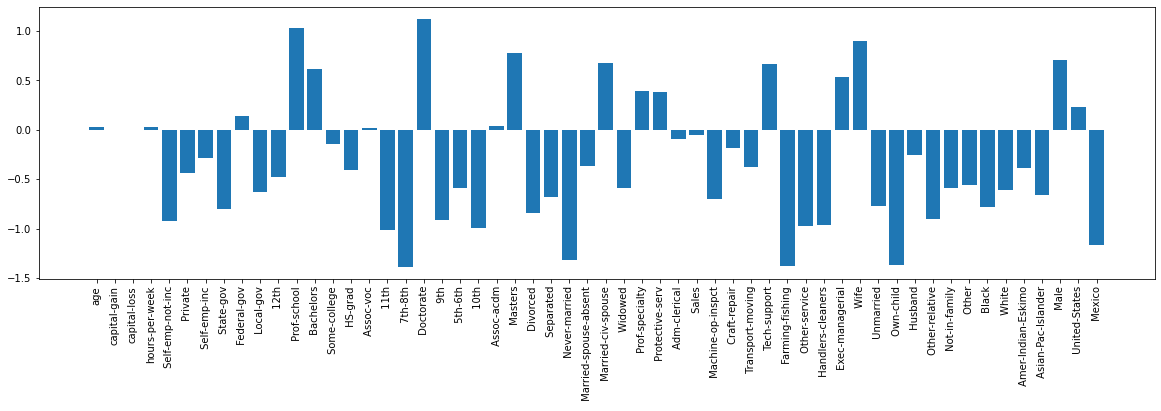

In [47]:
# get importance
importance = RL.coef_[0]
# plot feature importance
plt.figure(figsize=[20,5])
plt.bar(X_train.columns, importance)
plt.xticks(X_train.columns, X_train.columns, rotation='vertical')
plt.show()

### Supported Vector Classification (SVC)

In [48]:
#Import svm model
from sklearn import svm
from sklearn.linear_model import SGDClassifier

#### RBF kernel

In [49]:
#Create a svm Classifier
mySVC_model = svm.SVC(kernel='rbf') 

#Train the model using the training sets
mySVC = mySVC_model.fit(X_train, y_train, sample_weight = wght_train)

#accuracy
print('accuracy:')
acc(mySVC, X_test,y_test)

accuracy:


0.8477414007459594

#### Sigmoid kernel

In [50]:
#Create a svm Classifier
mySVC_model = svm.SVC(kernel='sigmoid') 

#Train the model using the training sets
mySVC = mySVC_model.fit(X_train, y_train, sample_weight = wght_train)

#accuracy
print('accuracy:')
acc(mySVC, X_test,y_test)

accuracy:


0.7994198093659345

#### Linear classifier with SGD training

In [51]:
mySGDClassifier_model = SGDClassifier()
mySGDClassifier = mySGDClassifier_model.fit(X_train,y_train, sample_weight = wght_train)

acc(mySGDClassifier, X_test,y_test)

0.6958143389970991

# 5. Podsumowanie

Otrzymana maksymalna wartość accuracy:

In [53]:
acc(RL1,X_test,y_test)

0.8490675507666805

Najlesze accuracy zostało uzyskane dla modelu regresji logistycznej z regularyzacją L1, niemniej jednak regresja logistyczna z domyślnymi ustawieniami, las losowy oraz SVC nie odbiegały znacząco - róznica w accuracy na poziomie dziesiątych częsci procenta. 

Analizując współczynniki przy zmiennych dla regresji logistycznej, widzimy, że najwyższe wartości zostały otrzymane dla cech związanych z wykształceniem wyższym. Ponadto widzimy, że bycie mężczyzną zwiększa szanse na bycie w grupie zarabiającej ponad 50 tys dolarów. Zmiennymi zmniejszającymi szanse na bycie w tej grupie są zmienne opisujące wykształcenie podstawowe oraz niektóre grupy zawodowe, takie jak Farming-fishing, Self-employed not inc., a nawet pochodzenie z Meksyku. 

Dla lasu losowego najważniejsze spośród zmiennych ilościowych okazały się kolejno zmienne age, capital-gain, hours-per-week, capital-loss. Ma to jak najbardziej sens, ponieważ intuicja podpowiada, że jest zależność między wiekiem a stażem pracy, a sam staż pracy często wpływa na zarobki. Zmienna hours-per-week mówiąca o tym, ile godzin w tygodniu pracuje dana osoba ma również, większe od zmiennej capital-loss. Ze zmiennych jakościowych, należy wyróżnić to czy dana osoba jest w małżeństwie cywilnym. Kolejną ważną informacją dla algorytmu okazała się zmienna Husband. Jako miejsce do dalszej analizy można by sprawdzić zależność między zmienna Husband oraz zmiennymi Married-civ-spuse oraz zmienną mówiącą o płci. 

Otrzymana wartość accuracy ok. 85% jest na zadowalającym poziomie. Z informacji zawartej na stronie z danymi możemy przeczytać, że błąd testowanych algorytmów wynosił od 14% do 21%, zatem przetestowane algorytmy są na tym zbiorze konkurencyjne.

Nie udało się wytrenować modelu SVC przy ustawieniu 'linear' i 'polynomial' dla kernela - czas trenowania był zbyt długi.  Najdłużej trwał trening modeli SVC. Optymalne hiperparametry dla lasu losowego mogą się różnić dla poszczególnych uruchomień kodu.